## Unsupervised Machine Learning

### Clustering:
    - Grouping unlabelled datapoints into groups or clusters representing similar data is called clustering.
    - Clustering is highly used in data analysis, customer segmentation, recommender systems, search engines, image segmentation, semi-supervised learning, dimensionality reduction, etc.
    - Some of the examples of Clustering usages are
    
        1. Anomaly Detection:
            - Also called Outlier Detection.
            - Abnormal instances in the data are called Anomalies, and normal instances are called Inliers. 
            - Anomaly detection is used in fraud detection such as detecting defective items in manufacturing, detecting new trends in time series, or removing outliers in a dataset before training the data with a new model.
            
        2. Density Estimation:
            - Commonly used for anamoly detection for instances located in very low-density regions.
            - Used in data analysis and visualization.
            - Used to estimate Probability Density Function (PDF) for the random process that generated the dataset.

### Clustering Algorithms:
    1. K-Means:
       - K-means is a data clustering approach for unsupervised machine learning that can separate unlabeled data into a predetermined number of disjoint groups of equal variance – clusters – based on their similarities.
        - The amount of clusters created is determined by the value of k – a hyperparameter that’s chosen before running the algorithm.
     2. DBSCAN:
         - Density Based Spatial Clustering of Applications with Noise.
         - DBSCAN algorithm defines clusters as continuous regions of high density.

### Objective:
 1. Data Ingestion
 2. Scaling
 3. Factor Analysis
 4. K-Means
 5. DBSCAN
 6. Comments

In [16]:
## Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import FactorAnalysis 
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity

from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

In [17]:
vehicle_df = pd.read_csv("./data/Vehicle Clustering.csv")
vehicle_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183


In [18]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [19]:
vehicle_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183


In [20]:
# missing features
vehicle_df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
dtype: int64

In [21]:
# Dropping missing val
vehicle_df.dropna(inplace=True)

In [22]:
# Scaled Dataset
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(vehicle_df)

### factor_analyzer.factor_analyzer.calculate_kmo(x)

Calculate the Kaiser-Meyer-Olkin criterion for items and overall.

Looks at common Variance that each variable share with the rest.

This statistic represents the degree to which each observed variable is predicted, without error, by the other
variables in the dataset. In general, a KMO < 0.6 is considered inadequate.

Parameters x (array-like) – The array from which to calculate KMOs.

Returns
• kmo_per_variable (numpy.ndarray) – The KMO score per item.
• kmo_total (float) – The overall KMO score.

In [23]:
# KMO
calculate_kmo(scaled_data)

/Users/bishwast/anaconda3/lib/python3.10/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


(array([0.95491067, 0.85222797, 0.94052216, 0.80459498, 0.44218442,
        0.65120816, 0.7579506 , 0.76717976, 0.98584557, 0.84649634,
        0.87110158, 0.76372751, 0.89972572, 0.5731194 , 0.33807702,
        0.53711002, 0.5384046 , 0.67702365]),
 0.8077277756212844)

In [24]:
kmo_all, kmo_model = calculate_kmo(scaled_data)

In [25]:
kmo_all

array([0.95491067, 0.85222797, 0.94052216, 0.80459498, 0.44218442,
       0.65120816, 0.7579506 , 0.76717976, 0.98584557, 0.84649634,
       0.87110158, 0.76372751, 0.89972572, 0.5731194 , 0.33807702,
       0.53711002, 0.5384046 , 0.67702365])

In [26]:
kmo_model

0.8077277756212844

Above Kmo_Model is 0.80 which is greater tha 0.60, thus dataset is adequare for factor analysis.

In [27]:
# total shape of the data, 812 rows and 18 colms
vehicle_df.shape

(813, 18)

In [28]:
# Reducing features of entire dataset to 4 for factor analysis
# which is 25% of 18 features. 
fac_analysis = FactorAnalysis(n_components= 4)
fac_analysis_df = fac_analysis.fit_transform(scaled_data)

## K-Means Clustering
    
    - Range of values for K: 1 to 15.
    - For range of K, calculate the Inertia (Weighted sum of Square) and save it in a List.
    - Plot the Elbow Curve for K and its Inertia.
    - Find probable numbers of clusters.
    - From Silhouette Score, finalize the number of clusters. 

K-Means Inertia: https://www.codecademy.com/learn/machine-learning/modules/dspath-clustering/cheatsheet

In [29]:
# Empty list of K-means Inertia
k_inertia = []

# Loop over each clusters or components
for k in range(1,15):
    k_means = KMeans(n_clusters = k)
    k_means.fit(fac_analysis_df)
    k_inertia.append(k_means.inertia_)

/Users/bishwast/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/bishwast/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/bishwast/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/bishwast/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/b

In [30]:
k_inertia

[3204.614979779616,
 2545.3617354889348,
 2030.3975480586346,
 1630.7770031078896,
 1175.967760810538,
 1023.3464958564932,
 917.1492785525427,
 838.7061741945686,
 768.3993541542272,
 707.8849912092987,
 663.9918380233107,
 625.6145648289139,
 592.9735652275415,
 559.2640532787816]

Elbow diagram:

To find the optimal K for a dataset, use the Elbow method; find the point where the decrease in inertia begins to slow.

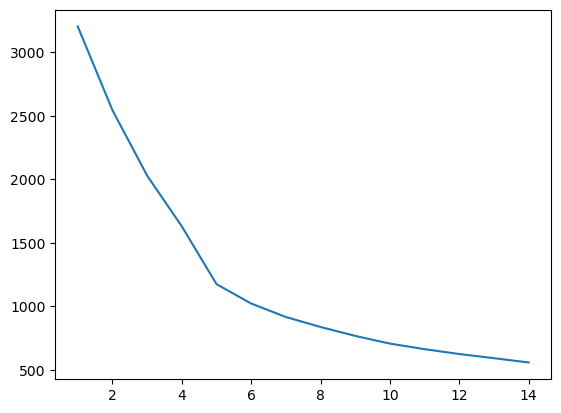

In [31]:
plt.plot(range(1,15), k_inertia)

Above, the Inertia decreases somewhere in between 5 to 6. Here the clusters k can be 5. To be sure, I am applying Silhouette Score. 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

In [33]:
# Silhouette Cluster

for k in range(2,7):
    k_means = KMeans(n_clusters= k, random_state= 15)
    k_means.fit(fac_analysis_df)
    labels = k_means.labels_
    print(f"Silhoutte Score for k = {k} is {silhouette_score(fac_analysis_df, labels)}")

/Users/bishwast/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/bishwast/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/bishwast/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/bishwast/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhoutte Score for k = 2 is 0.24819815582788313
Silhoutte Score for k = 3 is 0.28751515043023257
Silhoutte Score for k = 4 is 0.3000670316895013
Silhoutte Score for k = 5 is 0.327487860683934
Silhoutte Score for k = 6 is 0.3420557445694533


/Users/bishwast/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


By Silhoutte Score best cluster is k = 6

In [34]:
import copy
data_kmeans = copy.deepcopy(vehicle_df)
k_means = KMeans(n_clusters= 6, random_state= 15)
k_means.fit(fac_analysis_df)
labels_six = k_means.labels_

/Users/bishwast/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [44]:
# Assigning Labels
data_kmeans['Labels_6'] = labels_six
data_kmeans.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,Labels,Labels_6
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,4,4
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,4,4
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,1,1
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,4,4
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,3,3


In [45]:
# Grouping by list
list(data_kmeans.groupby('Labels'))

[(0,
       compactness  circularity  distance_circularity  radius_ratio  \
  54           101         56.0                 104.0         185.0   
  85           110         58.0                 106.0         180.0   
  155          110         56.0                 103.0         223.0   
  171          106         54.0                 103.0         161.0   
  173           96         49.0                  98.0         187.0   
  193          107         55.0                  98.0         199.0   
  213          104         49.0                  89.0         168.0   
  274          107         57.0                 106.0         179.0   
  294          109         55.0                 102.0         169.0   
  321          113         57.0                 109.0         194.0   
  334          107         57.0                 102.0         184.0   
  375          109         52.0                  95.0         189.0   
  381          106         54.0                 100.0         227.0   
 

In [46]:
# grouping by means for 6 labels
data_kmeans.groupby('Labels').mean()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,Labels_6
Labels,,,,,,,,,,,,,,,,,,,
0,106.392857,54.285714,101.000000,189.678571,56.464286,5.642857,241.285714,27.678571,26.392857,165.678571,263.928571,862.785714,237.035714,82.535714,6.178571,15.857143,184.000000,184.642857,0.0
1,103.589189,52.837838,102.335135,203.421622,62.972973,10.400000,211.659459,31.432432,23.935135,166.351351,223.281081,665.340541,210.270270,70.572973,7.454054,14.945946,189.010811,198.475676,1.0
2,85.525253,40.782828,66.338384,130.575758,56.979798,6.893939,141.474747,48.227273,18.535354,138.646465,162.156566,295.308081,158.363636,79.146465,6.035354,10.949495,182.035354,186.525253,2.0
3,87.625000,45.250000,77.750000,268.125000,116.250000,49.250000,150.875000,44.625000,19.125000,152.000000,241.250000,335.375000,181.125000,109.500000,5.000000,10.625000,184.625000,192.375000,3.0
4,91.645455,44.654545,77.431818,162.281818,62.568182,8.186364,151.945455,44.140909,19.250000,148.231818,172.918182,349.004545,172.718182,68.704545,7.618182,8.513636,192.254545,199.559091,4.0
5,93.120690,39.477011,81.316092,177.195402,63.304598,7.752874,163.689655,40.902299,20.051724,135.304598,186.063218,409.333333,145.557471,68.000000,4.028736,17.126437,193.706897,200.379310,5.0


In [48]:
# Unique cluster labels
u_labels = np.unique(labels_six)

In [49]:
u_labels

array([0, 1, 2, 3, 4, 5], dtype=int32)

[]

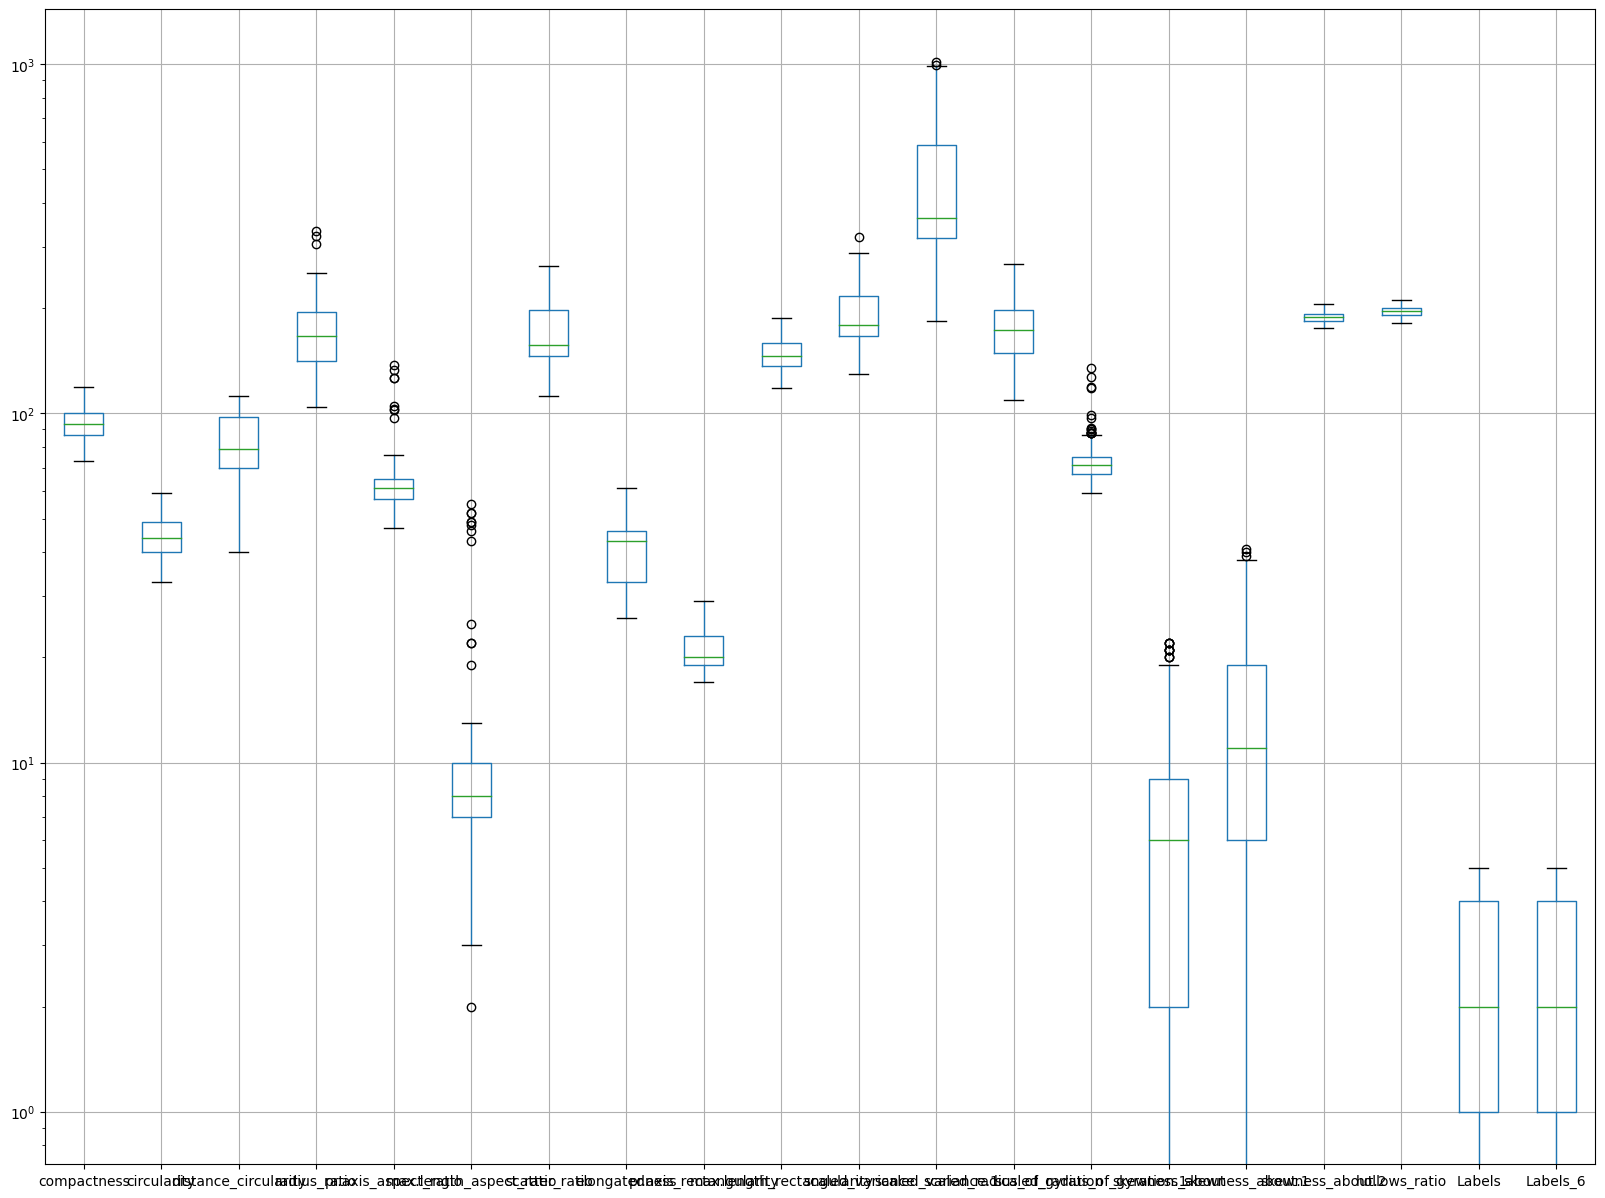

In [59]:
data_kmeans.boxplot(figsize=(20,15))
plt.semilogy()

Reference for bobplot: https://www.turing.com/kb/how-to-create-a-boxplot-in-python

<Axes: xlabel='skewness_about', ylabel='Labels_6'>

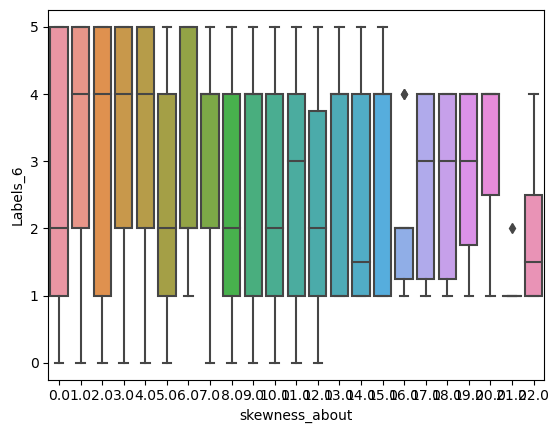

In [60]:
sns.boxplot(y = "Labels_6", x = "skewness_about", data = data_kmeans)